# Data Generation

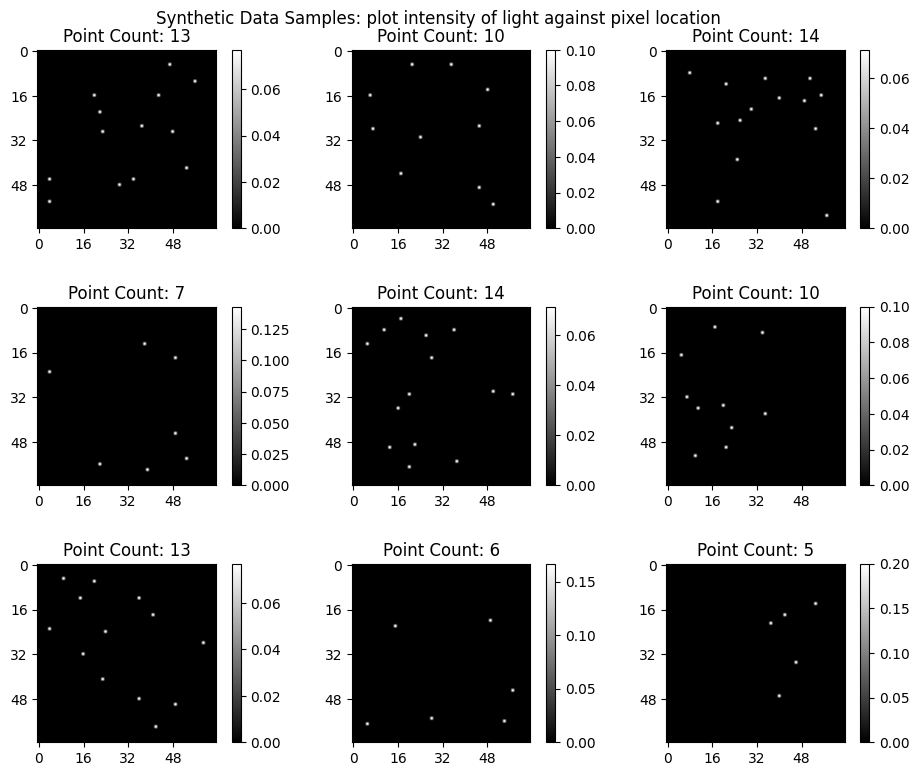

In [3]:
# Data Generation
from vanillanet.data import DiscretePointsDataset
from vanillanet.metrics import _normalize_intensity
import numpy as np
import matplotlib.pyplot as plt
import torch

plot_data = DiscretePointsDataset(num_samples=9, size=64, min_points=5, max_points=15, min_distance = 5, border = 4)

# Visualize the data
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.suptitle('Synthetic Data Samples: plot intensity of light against pixel location')
    normalized_data = _normalize_intensity(plot_data[i].unsqueeze(0))
    data_tensor = torch.from_numpy(normalized_data.squeeze(0).squeeze(0).numpy())
    im = plt.imshow(data_tensor, cmap='gray')
    plt.title(f'Point Count: {plot_data.get_point_count(i)}')
    
    # plt.xlabel('X (pixels)')
    # plt.ylabel('Y (pixels)')
    plt.xticks(np.arange(0, 64, 16))  # Show every 16th pixel
    plt.yticks(np.arange(0, 64, 16))  

    # Adjust spacing to prevent title overlap
    plt.tight_layout(pad=2.0)  # Add padding between subplots
    plt.subplots_adjust(top=0.93)  # Make room for the main title

    plt.colorbar(im, ax=plt.gca())
plt.savefig('images/synthetic_data_samples.png', bbox_inches='tight')

# Neural Network

TODO: Would be nice to change train_model to take in different models (not just VanillaNet which is currently hardcoded)

Training samples: 800, Validation samples: 200
Training Epoch 1


Epoch 1: 100%|██████████| 25/25 [00:02<00:00,  9.39it/s]


  Val breakdown: Inefficiency=0.202901, Non-uniformity=0.107080, Total=10707995.600000
Epoch [1/10] - Train Loss: 29570357.7600 - Val Loss: 10707995.6000 - LR: 0.001000
  -> New best validation loss: 10707995.6000
Training Epoch 2


Epoch 2: 100%|██████████| 25/25 [00:02<00:00, 10.02it/s]


  Val breakdown: Inefficiency=0.202912, Non-uniformity=0.058007, Total=5800723.700000
Epoch [2/10] - Train Loss: 9019989.7400 - Val Loss: 5800723.7000 - LR: 0.001000
  -> New best validation loss: 5800723.7000
Training Epoch 3


Epoch 3: 100%|██████████| 25/25 [00:02<00:00,  9.32it/s]


  Val breakdown: Inefficiency=0.202842, Non-uniformity=0.042249, Total=4224876.200000
Epoch [3/10] - Train Loss: 5150343.2800 - Val Loss: 4224876.2000 - LR: 0.001000
  -> New best validation loss: 4224876.2000
Training Epoch 4


Epoch 4: 100%|██████████| 25/25 [00:03<00:00,  7.71it/s]


  Val breakdown: Inefficiency=0.202819, Non-uniformity=0.035022, Total=3502163.290000
Epoch [4/10] - Train Loss: 3344300.2000 - Val Loss: 3502163.2900 - LR: 0.000500
  -> New best validation loss: 3502163.2900
Training Epoch 5


Epoch 5: 100%|██████████| 25/25 [00:02<00:00,  8.44it/s]


  Val breakdown: Inefficiency=0.202821, Non-uniformity=0.036035, Total=3603473.490000
Epoch [5/10] - Train Loss: 2364113.0900 - Val Loss: 3603473.4900 - LR: 0.000500
  -> No improvement for 1 epochs
Training Epoch 6


Epoch 6: 100%|██████████| 25/25 [00:02<00:00,  9.95it/s]


  Val breakdown: Inefficiency=0.202830, Non-uniformity=0.036782, Total=3678169.320000
Epoch [6/10] - Train Loss: 2040729.0900 - Val Loss: 3678169.3200 - LR: 0.000500
  -> No improvement for 2 epochs
Training Epoch 7


Epoch 7: 100%|██████████| 25/25 [00:02<00:00, 10.38it/s]


  Val breakdown: Inefficiency=0.202818, Non-uniformity=0.034861, Total=3486084.020000
Epoch [7/10] - Train Loss: 1851494.8700 - Val Loss: 3486084.0200 - LR: 0.000250
  -> New best validation loss: 3486084.0200
Training Epoch 8


Epoch 8: 100%|██████████| 25/25 [00:02<00:00, 10.19it/s]


  Val breakdown: Inefficiency=0.202815, Non-uniformity=0.033890, Total=3388965.220000
Epoch [8/10] - Train Loss: 1286940.8250 - Val Loss: 3388965.2200 - LR: 0.000250
  -> New best validation loss: 3388965.2200
Training Epoch 9


Epoch 9: 100%|██████████| 25/25 [00:02<00:00, 10.46it/s]


  Val breakdown: Inefficiency=0.202814, Non-uniformity=0.033788, Total=3378797.050000
Epoch [9/10] - Train Loss: 1026349.0575 - Val Loss: 3378797.0500 - LR: 0.000250
  -> New best validation loss: 3378797.0500
Training Epoch 10


Epoch 10: 100%|██████████| 25/25 [00:02<00:00, 10.26it/s]


  Val breakdown: Inefficiency=0.202816, Non-uniformity=0.033876, Total=3387639.700000
Epoch [10/10] - Train Loss: 865067.0400 - Val Loss: 3387639.7000 - LR: 0.000125
  -> No improvement for 1 epochs
Training complete.
Best validation loss: 3378797.0500


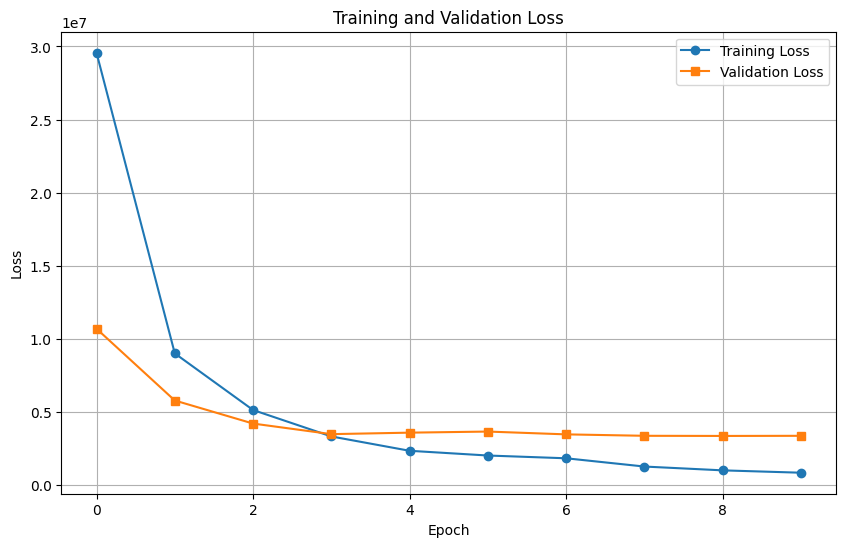

<Figure size 640x480 with 0 Axes>

In [6]:
from vanillanet.neural_net import train_model
from vanillanet.data import DiscretePointsDataset
from matplotlib import pyplot as plt
import torch

model, device, dataset, train_losses, val_losses = train_model(num_epochs = 10, lr = 1e-3, size = 64, batch_size=32,
                dataset = DiscretePointsDataset(num_samples=1000, size=64, min_points=5, max_points=15, min_distance = 5, border = 4))

torch.save(model.state_dict(), 'models/model1.pth')
model.load_state_dict(torch.load('models/model1.pth'))

# Plot training curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('images/training_and_validation_loss.png', bbox_inches='tight')

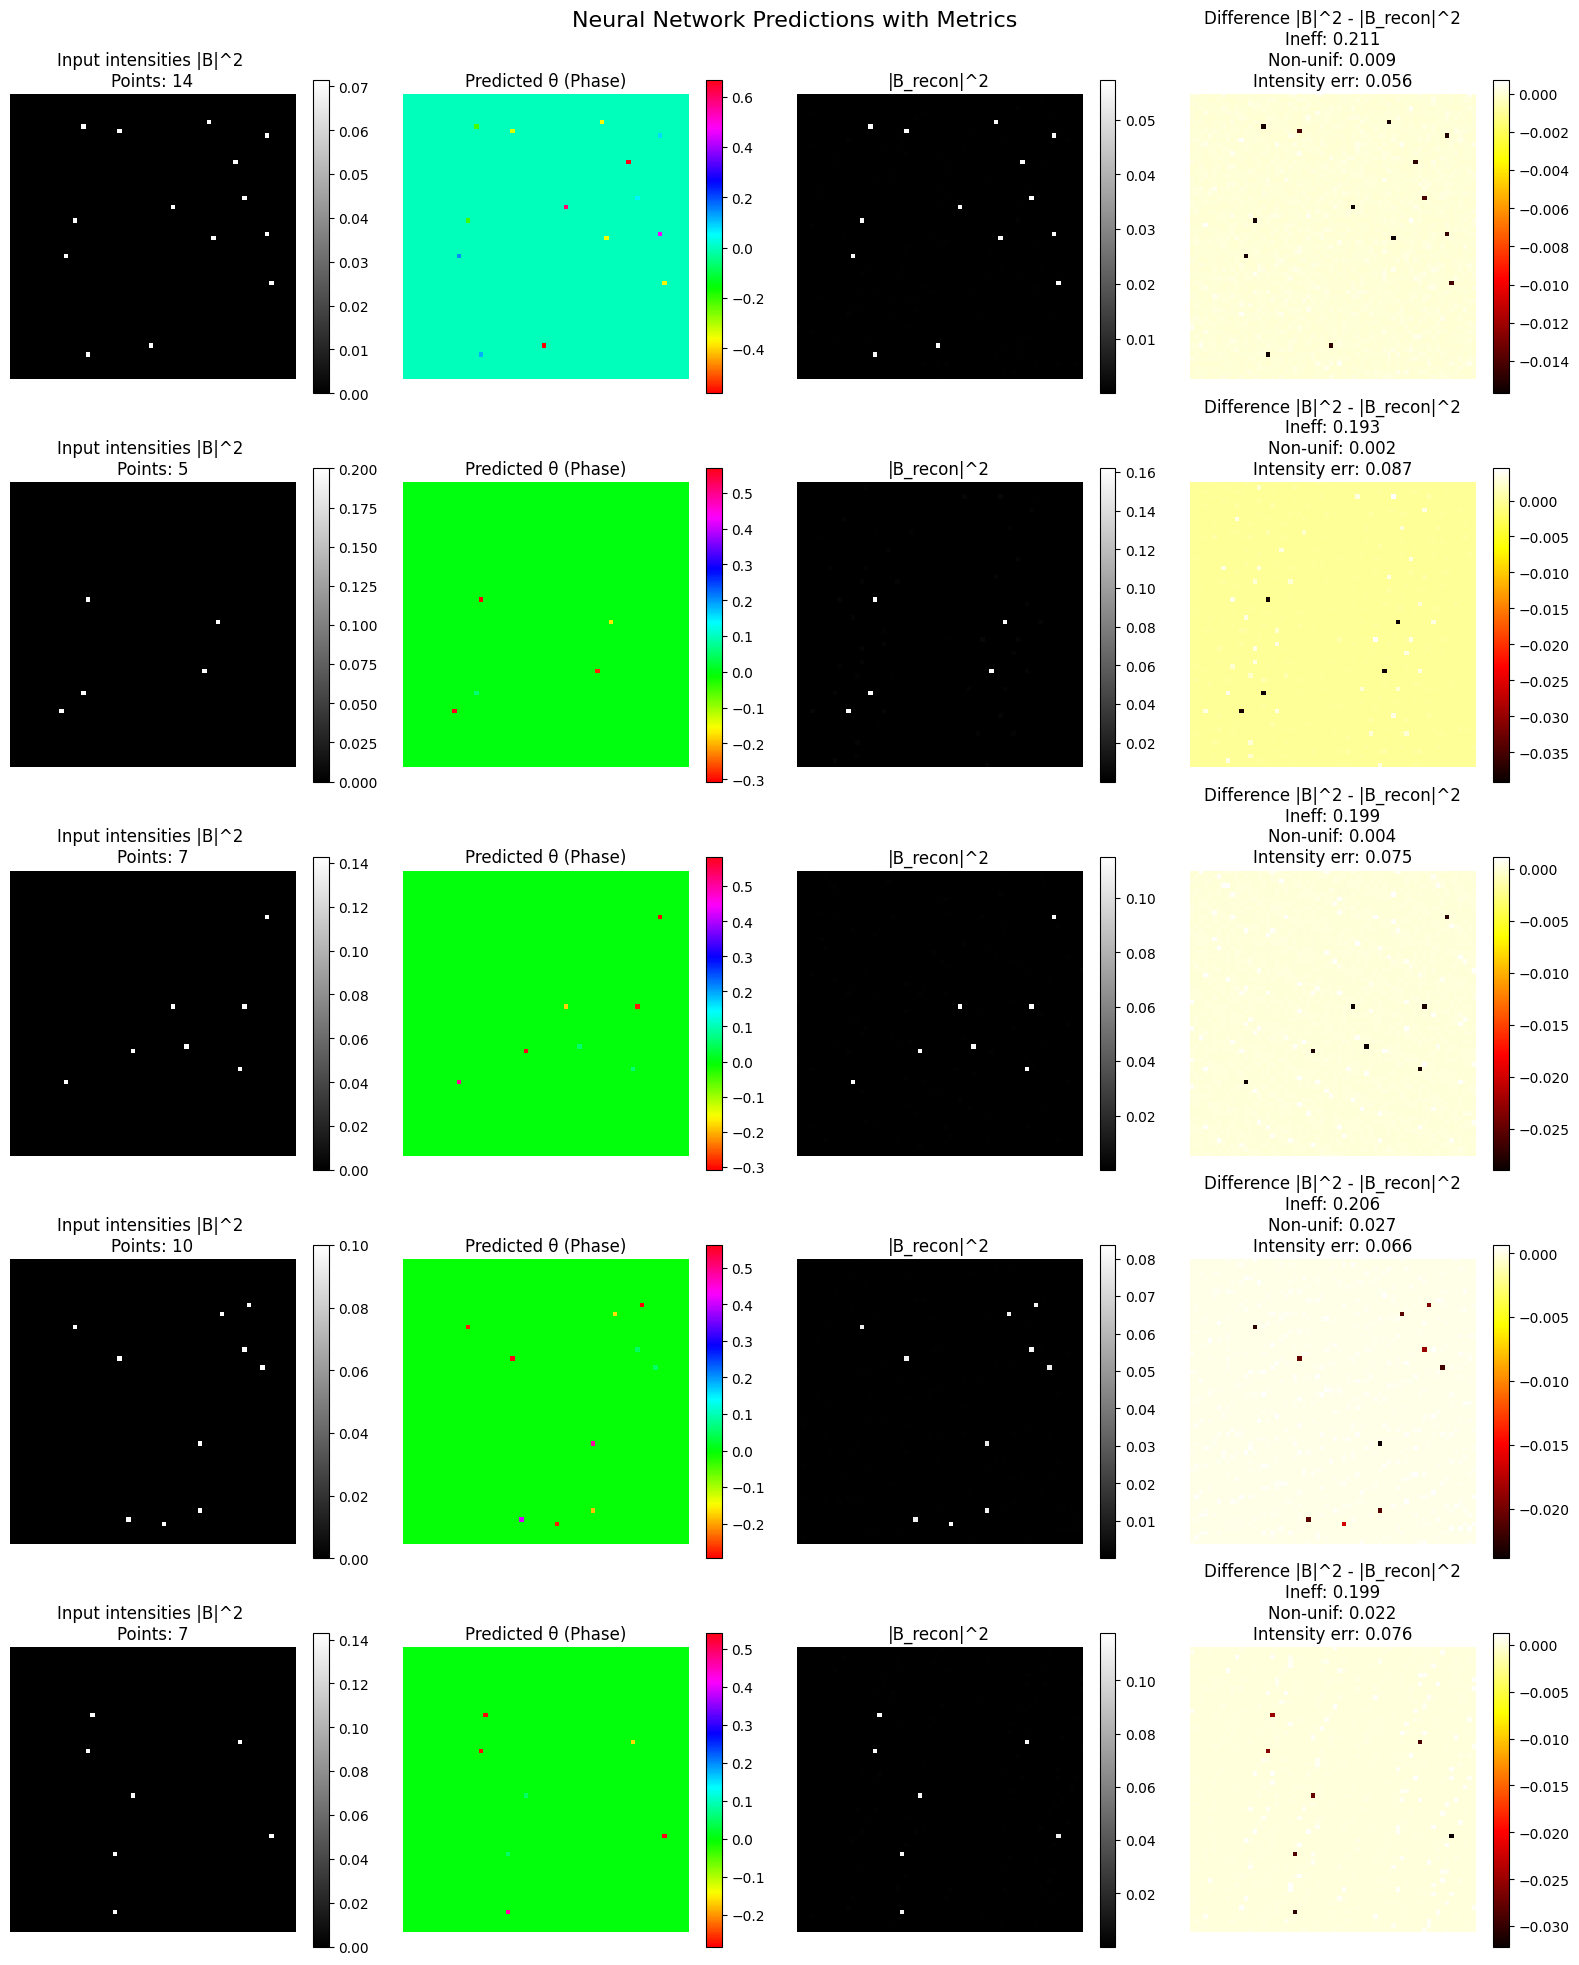

In [7]:
from vanillanet.neural_net import visualize_results_with_metrics
visualize_results_with_metrics(model, dataset, device, num_samples=5, debug = False)

# Gradient Descent (sparse representation)


--- Processing Sample 1/5 (Index 21) ---

--- Processing Sample 2/5 (Index 47) ---

--- Processing Sample 3/5 (Index 54) ---

--- Processing Sample 4/5 (Index 99) ---

--- Processing Sample 5/5 (Index 64) ---


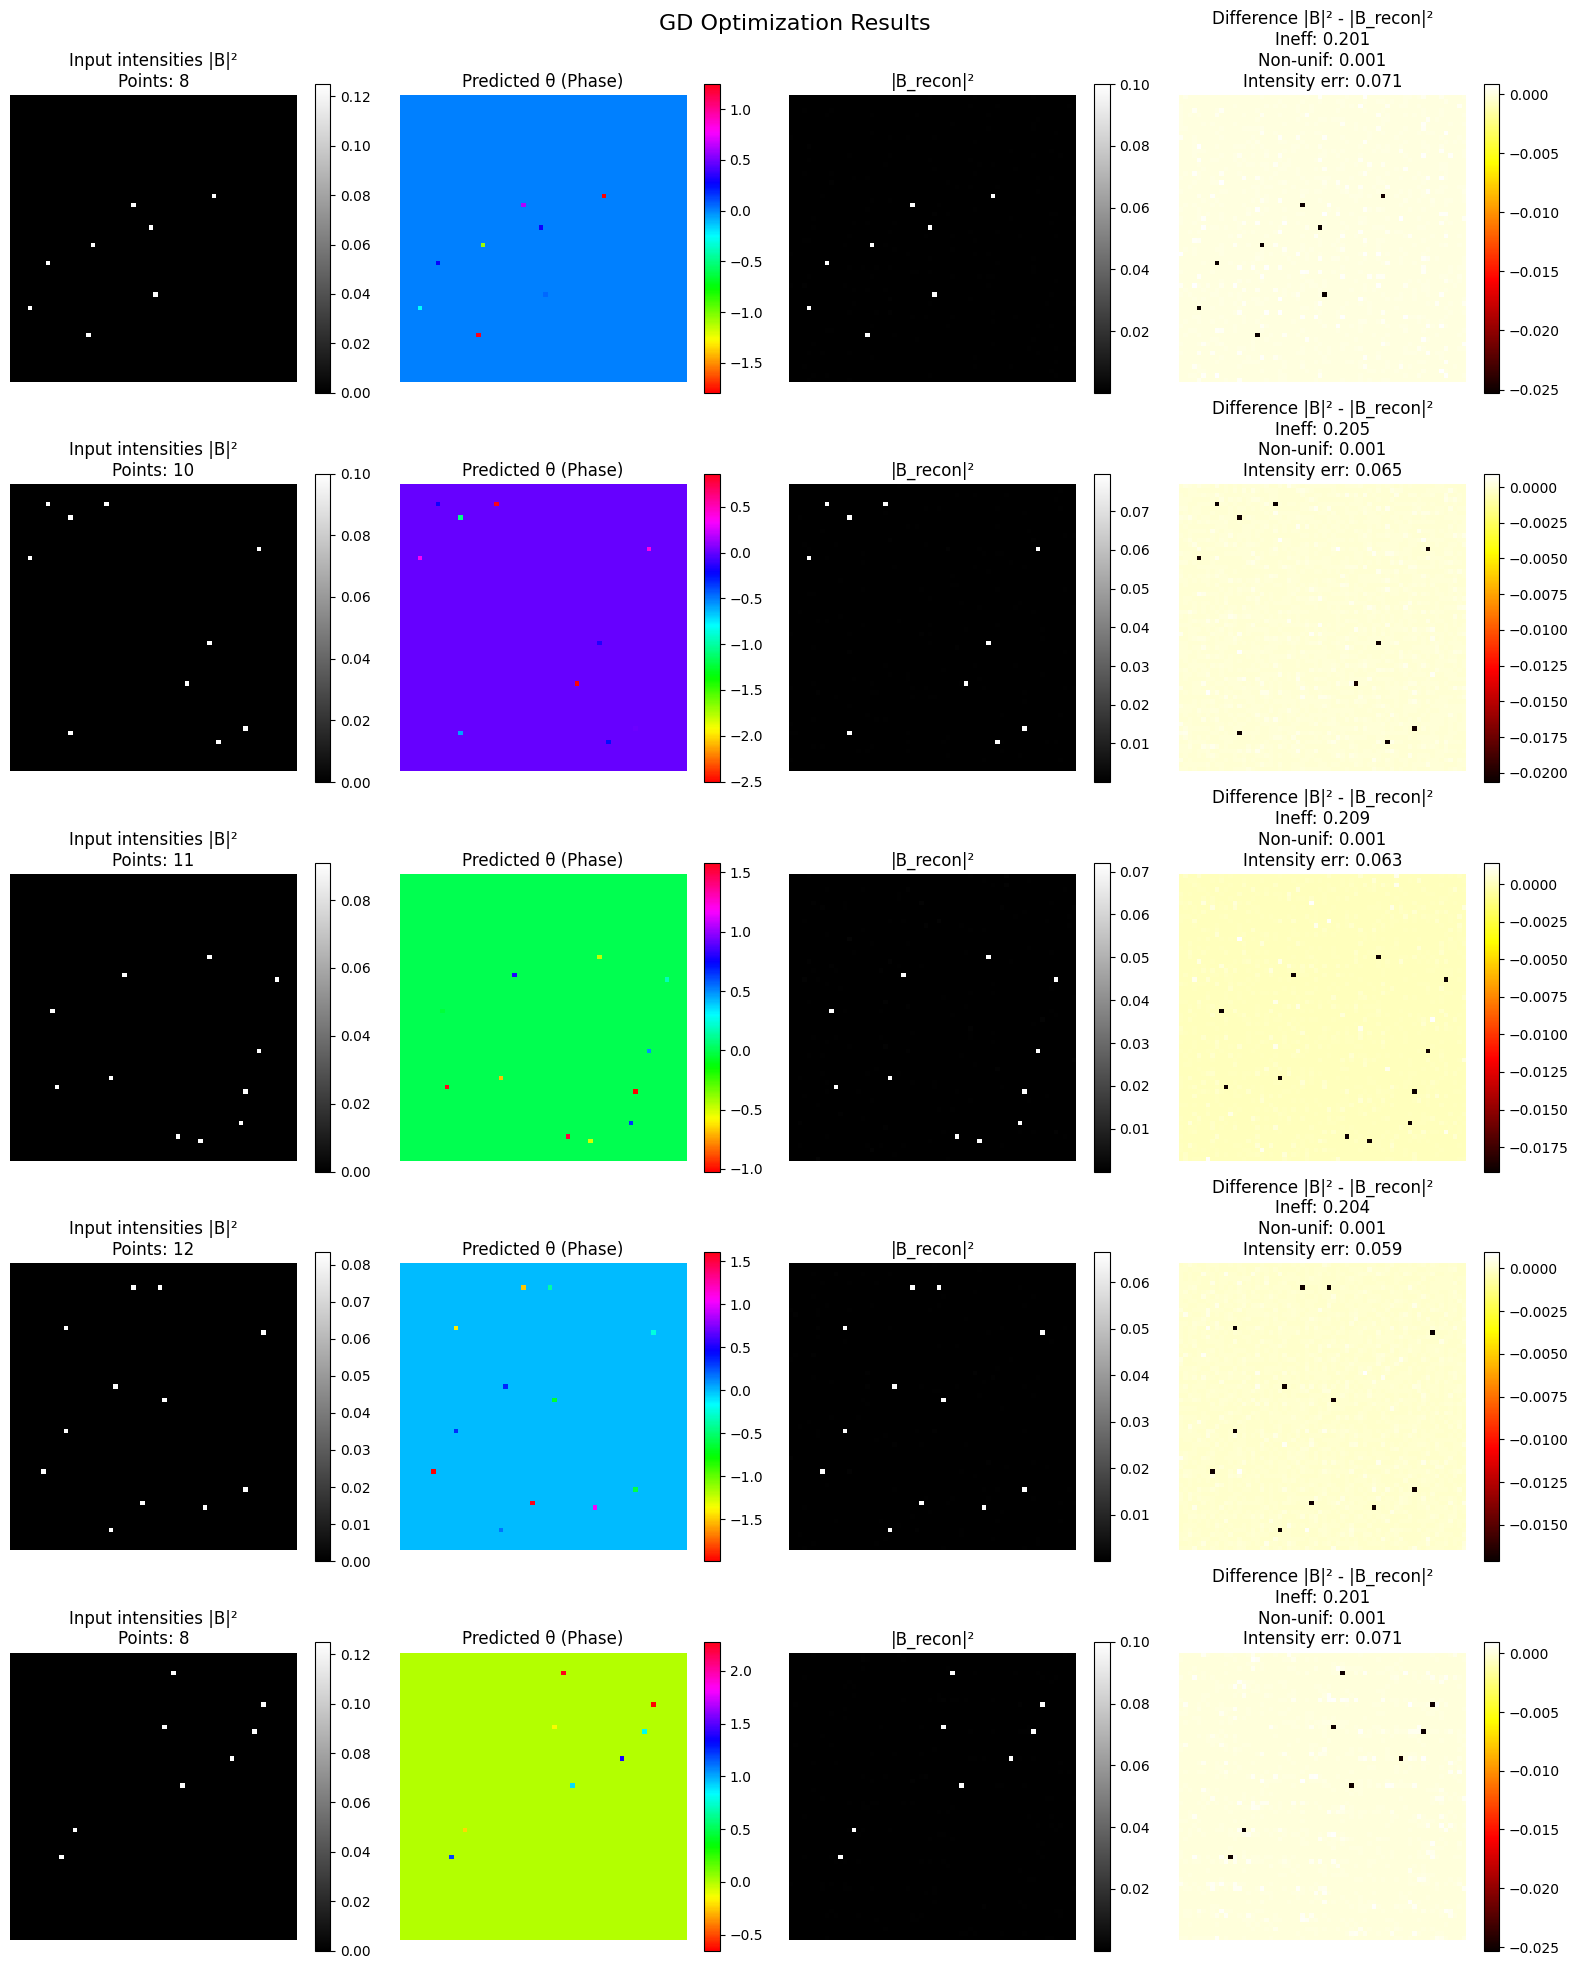


GD OPTIMIZATION RESULTS SUMMARY
Sample       Index  Points Efficiency Ineff    Non-unif Amp err  Final Loss
--------------------------------------------------------------------------------
sample_0     21     8      0.7986     0.201    0.001    0.071    1.2737    
sample_1     47     10     0.7953     0.205    0.001    0.065    1.4930    
sample_2     54     11     0.7907     0.209    0.001    0.063    1.2929    
sample_3     99     12     0.7960     0.204    0.001    0.059    1.2055    
sample_4     64     8      0.7993     0.201    0.001    0.071    1.3021    
--------------------------------------------------------------------------------
AVERAGE                    0.7960     0.204    0.001    0.066    1.3134    


In [8]:
from vanillanet.grad_des import visualize_gd_results_with_metrics
from vanillanet.data import DiscretePointsDataset
from vanillanet.device import get_device

device = get_device()

all_metrics, all_results = visualize_gd_results_with_metrics(
    dataset=DiscretePointsDataset(num_samples=100, size=64, min_points=5, max_points=15),
    device=device,
    num_samples=5,
    save_path='images/GD_sample_predictions.png',
    show_metrics=True,
    debug=False,
    iterations=1000,
    lr=0.01,
    verbose=True,
    var_cost = 1000, 
    show_loss_plot=False
)

# Gradient Descent (full representation)

# Gerchberg Saxton (Standard and Weighted)

Testing GS algorithm on 5 samples...
Using device: cpu

--- Sample 1 ---
Weighted GS quality requirements:
  Inefficiency must be < 0.3
  Non-uniformity must be < 0.1
Iteration 1: Waiting for stability...
  Inefficiency change: inf (need < 1e-06)
  Non-uniformity change: inf (need < 1e-06)
Iteration 1/100
  MSE Error: 4095.757324
  Inefficiency: 0.998242
  Non-uniformity: 0.775080
Iteration 11/100
  MSE Error: 4090.351074
  Inefficiency: 0.201528
  Non-uniformity: 0.000829
Iteration 21/100
  MSE Error: 4090.347900
  Inefficiency: 0.200736
  Non-uniformity: 0.000728
Iteration 31/100
  MSE Error: 4090.344727
  Inefficiency: 0.199810
  Non-uniformity: 0.000944
Iteration 41/100
  MSE Error: 4090.340820
  Inefficiency: 0.198640
  Non-uniformity: 0.001228
Iteration 51: Waiting for stability...
  Inefficiency change: 0.00003612 (need < 1e-06)
  Non-uniformity change: 0.00004509 (need < 1e-06)
Iteration 51/100
  MSE Error: 4090.337891
  Inefficiency: 0.197936
  Non-uniformity: 0.000464
Iterati

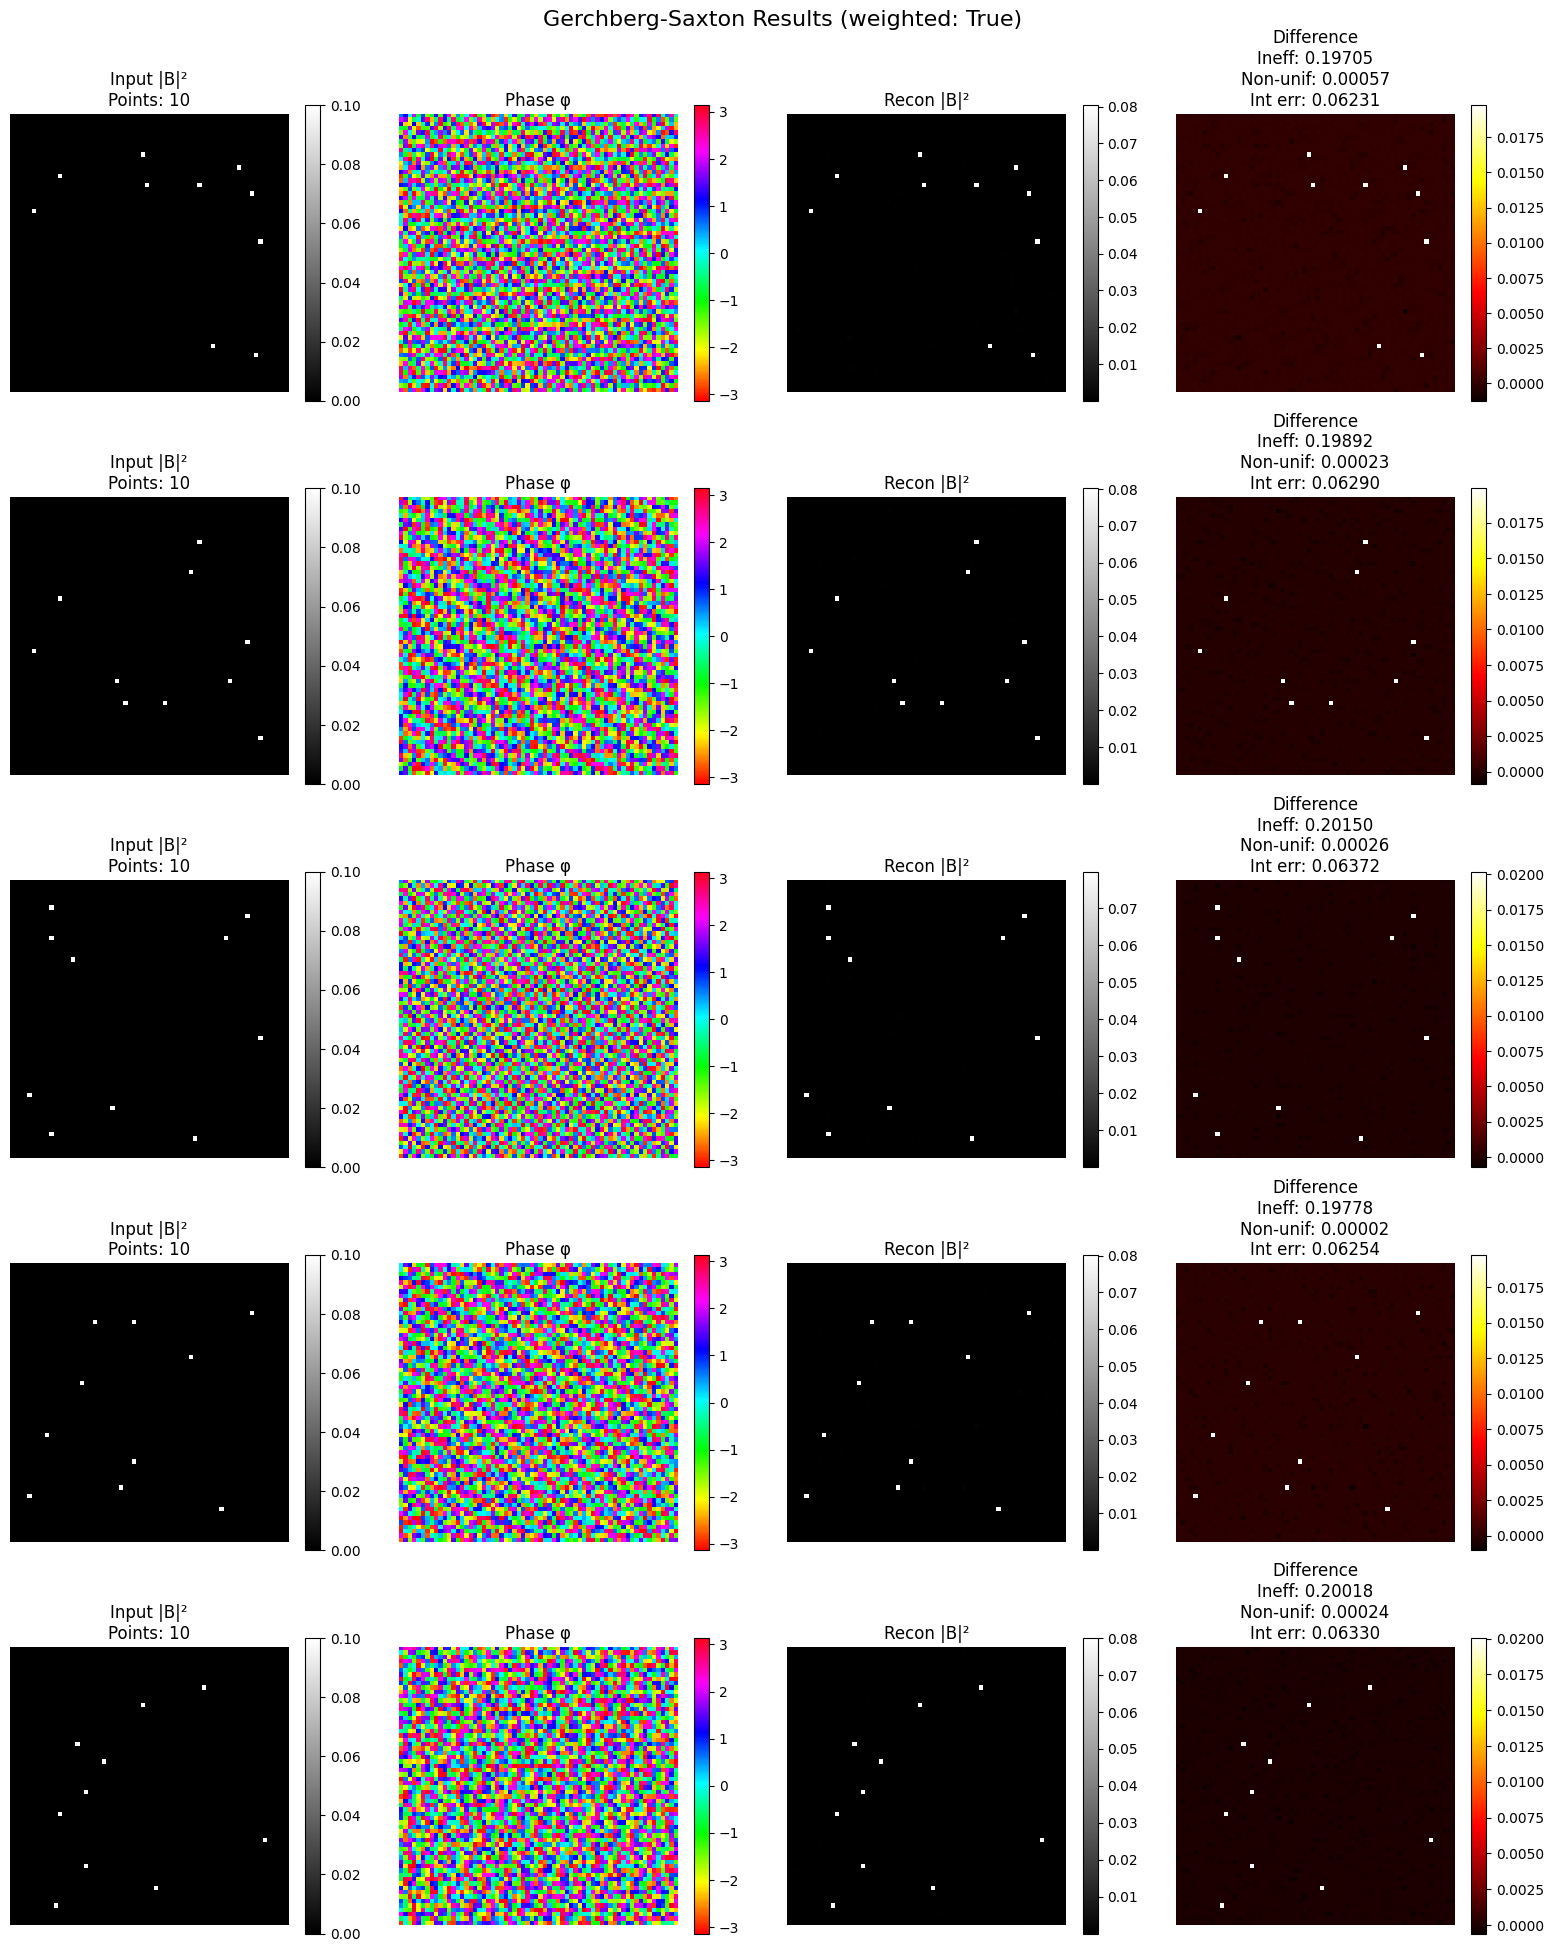


GS Algorithm Results Summary:
Weighted: True
Sample   Points Ineff    Non-unif Intensity err
--------------------------------------------------
Sample 1  10     0.197    0.001    0.062   
Sample 2  10     0.199    0.000    0.063   
Sample 3  10     0.202    0.000    0.064   
Sample 4  10     0.198    0.000    0.063   
Sample 5  10     0.200    0.000    0.063   


In [9]:
from vanillanet.gs import test_gerchberg_saxton

weighted_results = test_gerchberg_saxton(debug = False, weighted=True, num_iterations = 100, num_samples = 5)

Testing GS algorithm on 15 samples...
Using device: cpu

--- Sample 1 ---
Iteration 1/100
  MSE Error: 4095.737793
  Inefficiency: 0.998075
  Non-uniformity: 0.593664
Iteration 11/100
  MSE Error: 4090.349609
  Inefficiency: 0.201114
  Non-uniformity: 0.019904
Iteration 21/100
  MSE Error: 4090.342773
  Inefficiency: 0.199127
  Non-uniformity: 0.025268
Iteration 31/100
  MSE Error: 4090.333496
  Inefficiency: 0.196503
  Non-uniformity: 0.027336
Iteration 41/100
  MSE Error: 4090.331299
  Inefficiency: 0.195891
  Non-uniformity: 0.031956
Iteration 51/100
  MSE Error: 4090.330811
  Inefficiency: 0.195709
  Non-uniformity: 0.031825
Iteration 61/100
  MSE Error: 4090.330566
  Inefficiency: 0.195581
  Non-uniformity: 0.029675
Iteration 71/100
  MSE Error: 4090.330078
  Inefficiency: 0.195456
  Non-uniformity: 0.028943
Iteration 81/100
  MSE Error: 4090.330078
  Inefficiency: 0.195356
  Non-uniformity: 0.029262
Iteration 91/100
  MSE Error: 4090.329102
  Inefficiency: 0.195266
  Non-uniformi

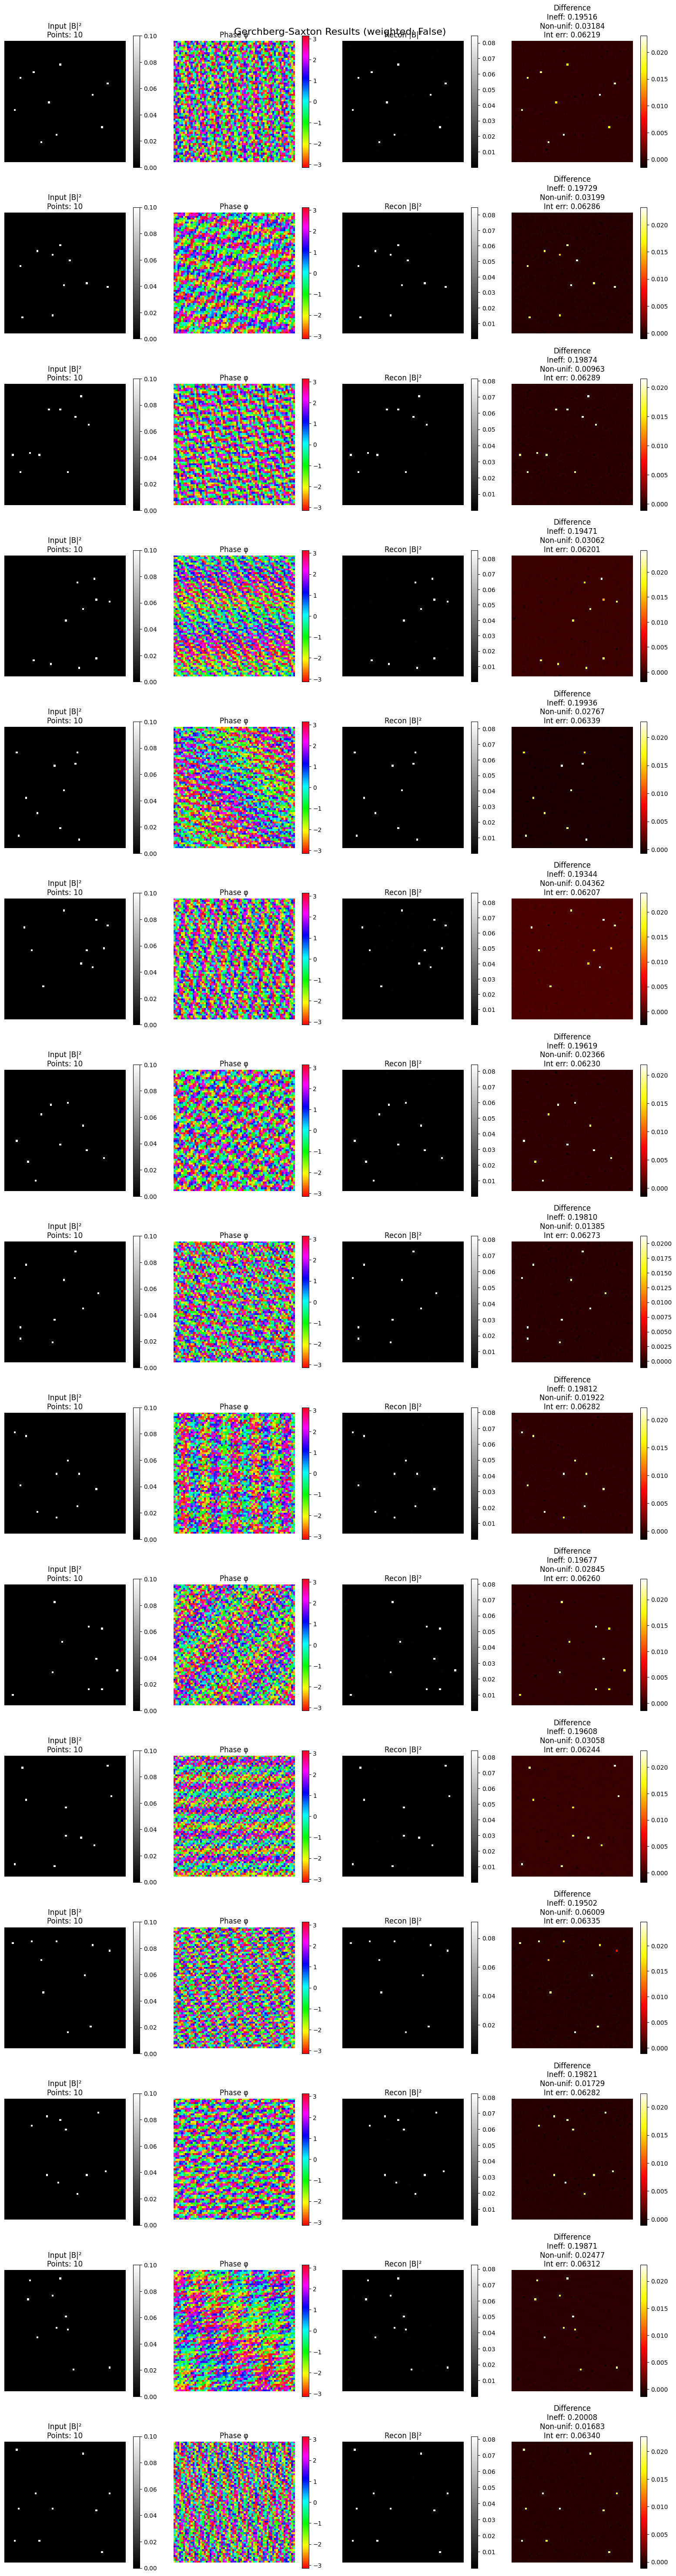


GS Algorithm Results Summary:
Weighted: False
Sample   Points Ineff    Non-unif Intensity err
--------------------------------------------------
Sample 1  10     0.195    0.032    0.062   
Sample 2  10     0.197    0.032    0.063   
Sample 3  10     0.199    0.010    0.063   
Sample 4  10     0.195    0.031    0.062   
Sample 5  10     0.199    0.028    0.063   
Sample 6  10     0.193    0.044    0.062   
Sample 7  10     0.196    0.024    0.062   
Sample 8  10     0.198    0.014    0.063   
Sample 9  10     0.198    0.019    0.063   
Sample 10 10     0.197    0.028    0.063   
Sample 11 10     0.196    0.031    0.062   
Sample 12 10     0.195    0.060    0.063   
Sample 13 10     0.198    0.017    0.063   
Sample 14 10     0.199    0.025    0.063   
Sample 15 10     0.200    0.017    0.063   


In [10]:
non_weighted_results = test_gerchberg_saxton(debug = False, weighted=False, num_iterations = 100, num_samples = 15)

# 4 Way Comparison 

⚠️  Device mismatch detected!
   Model is on: mps:0
   Requested device: mps
   Moving model to mps...
Comparing all methods on 10 samples...
Using device: mps
Model device: mps:0

--- Sample 1 (Index 565) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.800049
  Inefficiency: 0.998332
  Non-uniformity: 1.020979
Iteration 11/2000
  MSE Error: 4090.939453
  Inefficiency: 0.198436
  Non-uniformity: 0.051210
Iteration 21/2000
  MSE Error: 4090.938477
  Inefficiency: 0.198128
  Non-uniformity: 0.054119
Iteration 31/2000
  MSE Error: 4090.938477
  Inefficiency: 0.198050
  Non-uniformity: 0.055259
Iteration 41/2000
  MSE Error: 4090.938232
  Inefficiency: 0.198023
  Non-uniformity: 0.055690
Iteration 51/2000
  MSE Error: 4090.937988
  Inefficiency: 0.198011
  Non-uniformity: 0.055857
Iteration 61/2000
  MSE Error: 4090.938232
  Inefficiency: 0.198004
  Non-uniformity: 0.055936
Iteration 71/2000
  MSE Error: 4090.938232
  Inefficiency: 0.198000
  Non-uniformity: 0

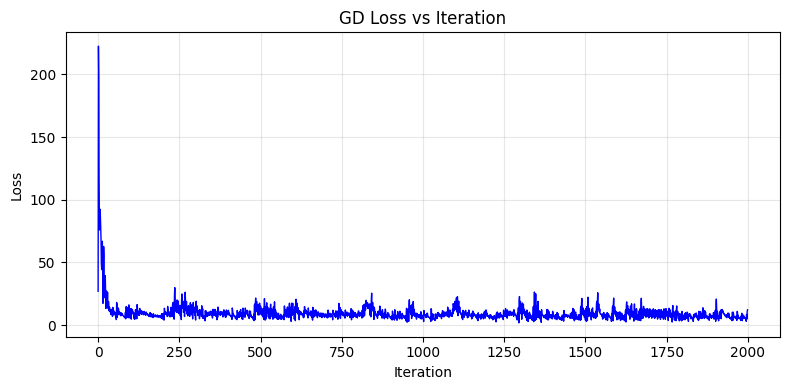

Loss decreased from 27.031315 to 12.220949
Total improvement: 54.79%
Running Neural Network...

--- Sample 2 (Index 137) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.605957
  Inefficiency: 0.996263
  Non-uniformity: 0.974010
Iteration 11/2000
  MSE Error: 4089.519287
  Inefficiency: 0.189731
  Non-uniformity: 0.094303
Iteration 21/2000
  MSE Error: 4089.517578
  Inefficiency: 0.189375
  Non-uniformity: 0.094961
Iteration 31/2000
  MSE Error: 4089.515869
  Inefficiency: 0.189081
  Non-uniformity: 0.092289
Iteration 41/2000
  MSE Error: 4089.515137
  Inefficiency: 0.188895
  Non-uniformity: 0.090741
Iteration 51/2000
  MSE Error: 4089.513184
  Inefficiency: 0.188485
  Non-uniformity: 0.090853
Iteration 61/2000
  MSE Error: 4089.510742
  Inefficiency: 0.187896
  Non-uniformity: 0.089647
Iteration 71/2000
  MSE Error: 4089.509277
  Inefficiency: 0.187693
  Non-uniformity: 0.085487
Iteration 81/2000
  MSE Error: 4089.509277
  Inefficiency: 0.187690
  Non-uni

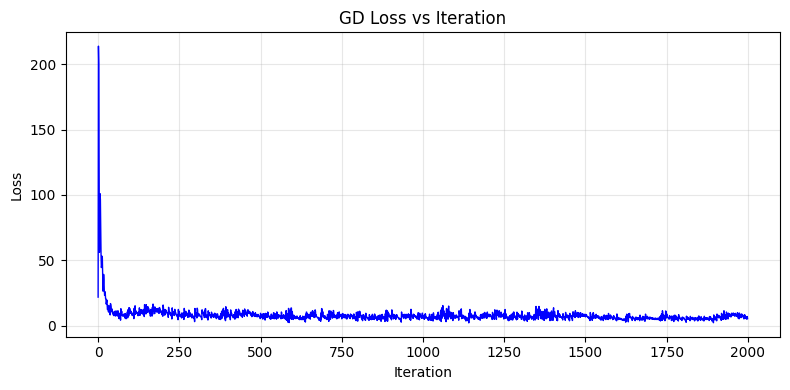

Loss decreased from 21.956923 to 5.622505
Total improvement: 74.39%
Running Neural Network...

--- Sample 3 (Index 396) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.742432
  Inefficiency: 0.997688
  Non-uniformity: 0.923652
Iteration 11/2000
  MSE Error: 4090.654785
  Inefficiency: 0.205569
  Non-uniformity: 0.008898
Iteration 21/2000
  MSE Error: 4090.640869
  Inefficiency: 0.201417
  Non-uniformity: 0.027298
Iteration 31/2000
  MSE Error: 4090.627686
  Inefficiency: 0.197236
  Non-uniformity: 0.038297
Iteration 41/2000
  MSE Error: 4090.622559
  Inefficiency: 0.195745
  Non-uniformity: 0.039673
Iteration 51/2000
  MSE Error: 4090.621094
  Inefficiency: 0.195352
  Non-uniformity: 0.040370
Iteration 61/2000
  MSE Error: 4090.620605
  Inefficiency: 0.195259
  Non-uniformity: 0.039151
Iteration 71/2000
  MSE Error: 4090.621094
  Inefficiency: 0.195210
  Non-uniformity: 0.038681
Iteration 81/2000
  MSE Error: 4090.620605
  Inefficiency: 0.195192
  Non-unif

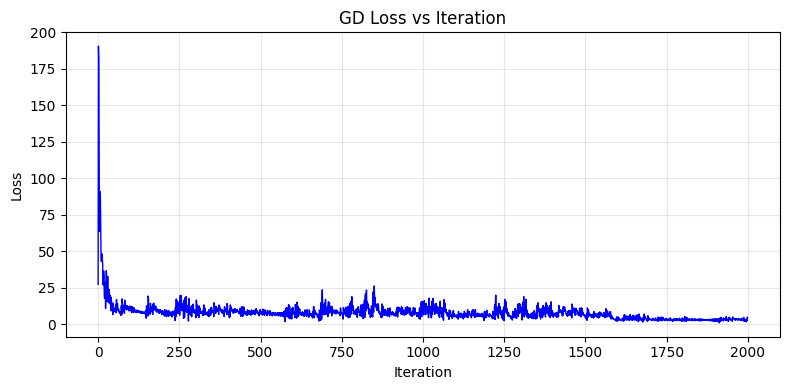

Loss decreased from 27.298206 to 4.795537
Total improvement: 82.43%
Running Neural Network...

--- Sample 4 (Index 4) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.602539
  Inefficiency: 0.995764
  Non-uniformity: 1.384712
Iteration 11/2000
  MSE Error: 4089.333496
  Inefficiency: 0.205458
  Non-uniformity: 0.022616
Iteration 21/2000
  MSE Error: 4089.322510
  Inefficiency: 0.202764
  Non-uniformity: 0.025965
Iteration 31/2000
  MSE Error: 4089.318359
  Inefficiency: 0.201757
  Non-uniformity: 0.026227
Iteration 41/2000
  MSE Error: 4089.316406
  Inefficiency: 0.201240
  Non-uniformity: 0.026240
Iteration 51/2000
  MSE Error: 4089.314697
  Inefficiency: 0.200864
  Non-uniformity: 0.026079
Iteration 61/2000
  MSE Error: 4089.312012
  Inefficiency: 0.200232
  Non-uniformity: 0.024629
Iteration 71/2000
  MSE Error: 4089.311035
  Inefficiency: 0.199942
  Non-uniformity: 0.025519
Iteration 81/2000
  MSE Error: 4089.310059
  Inefficiency: 0.199797
  Non-unifor

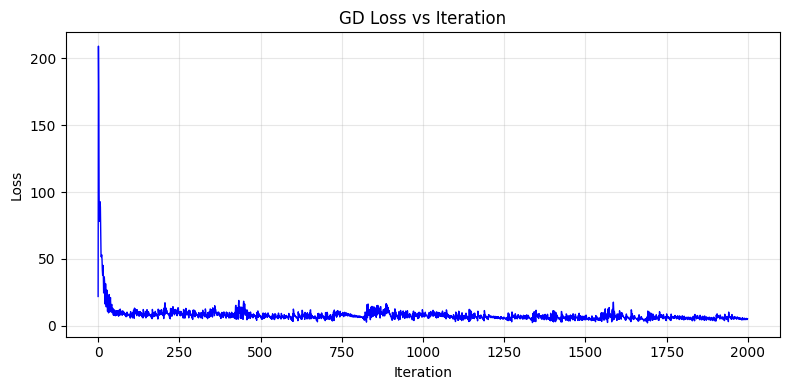

Loss decreased from 21.919271 to 5.170737
Total improvement: 76.41%
Running Neural Network...

--- Sample 5 (Index 199) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.808838
  Inefficiency: 0.998355
  Non-uniformity: 0.886585
Iteration 11/2000
  MSE Error: 4091.265381
  Inefficiency: 0.198634
  Non-uniformity: 0.013962
Iteration 21/2000
  MSE Error: 4091.264648
  Inefficiency: 0.198307
  Non-uniformity: 0.015377
Iteration 31/2000
  MSE Error: 4091.263672
  Inefficiency: 0.198227
  Non-uniformity: 0.015415
Iteration 41/2000
  MSE Error: 4091.264160
  Inefficiency: 0.198177
  Non-uniformity: 0.014393
Iteration 51/2000
  MSE Error: 4091.263672
  Inefficiency: 0.198129
  Non-uniformity: 0.013022
Iteration 61/2000
  MSE Error: 4091.263916
  Inefficiency: 0.198091
  Non-uniformity: 0.012473
Iteration 71/2000
  MSE Error: 4091.263184
  Inefficiency: 0.198069
  Non-uniformity: 0.012139
Iteration 81/2000
  MSE Error: 4091.263672
  Inefficiency: 0.198049
  Non-unif

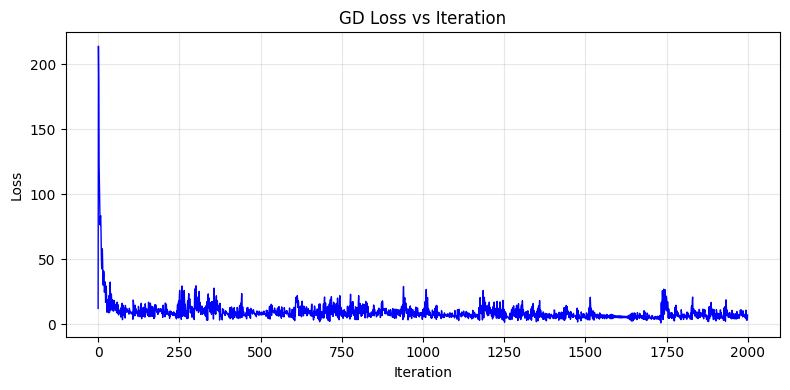

Loss decreased from 12.218889 to 7.144692
Total improvement: 41.53%
Running Neural Network...

--- Sample 6 (Index 267) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.641602
  Inefficiency: 0.997336
  Non-uniformity: 1.049789
Iteration 11/2000
  MSE Error: 4089.086426
  Inefficiency: 0.202274
  Non-uniformity: 0.033215
Iteration 21/2000
  MSE Error: 4089.082031
  Inefficiency: 0.201225
  Non-uniformity: 0.034056
Iteration 31/2000
  MSE Error: 4089.080566
  Inefficiency: 0.200887
  Non-uniformity: 0.035336
Iteration 41/2000
  MSE Error: 4089.079590
  Inefficiency: 0.200744
  Non-uniformity: 0.035010
Iteration 51/2000
  MSE Error: 4089.079346
  Inefficiency: 0.200593
  Non-uniformity: 0.035312
Iteration 61/2000
  MSE Error: 4089.077637
  Inefficiency: 0.200201
  Non-uniformity: 0.034874
Iteration 71/2000
  MSE Error: 4089.074463
  Inefficiency: 0.199525
  Non-uniformity: 0.034261
Iteration 81/2000
  MSE Error: 4089.072998
  Inefficiency: 0.199137
  Non-unif

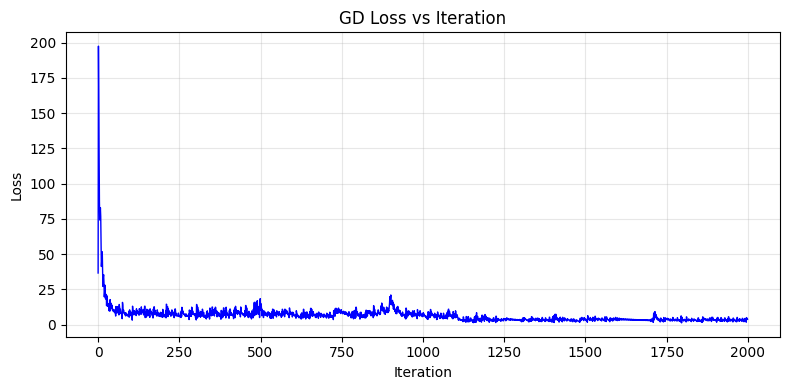

Loss decreased from 36.668964 to 3.917764
Total improvement: 89.32%
Running Neural Network...

--- Sample 7 (Index 441) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.664062
  Inefficiency: 0.997093
  Non-uniformity: 1.013819
Iteration 11/2000
  MSE Error: 4089.535156
  Inefficiency: 0.194234
  Non-uniformity: 0.080265
Iteration 21/2000
  MSE Error: 4089.525879
  Inefficiency: 0.191919
  Non-uniformity: 0.078985
Iteration 31/2000
  MSE Error: 4089.522949
  Inefficiency: 0.191213
  Non-uniformity: 0.078118
Iteration 41/2000
  MSE Error: 4089.519775
  Inefficiency: 0.190617
  Non-uniformity: 0.071704
Iteration 51/2000
  MSE Error: 4089.517578
  Inefficiency: 0.190216
  Non-uniformity: 0.063609
Iteration 61/2000
  MSE Error: 4089.516357
  Inefficiency: 0.189986
  Non-uniformity: 0.061419
Iteration 71/2000
  MSE Error: 4089.515381
  Inefficiency: 0.189738
  Non-uniformity: 0.061364
Iteration 81/2000
  MSE Error: 4089.514404
  Inefficiency: 0.189540
  Non-unif

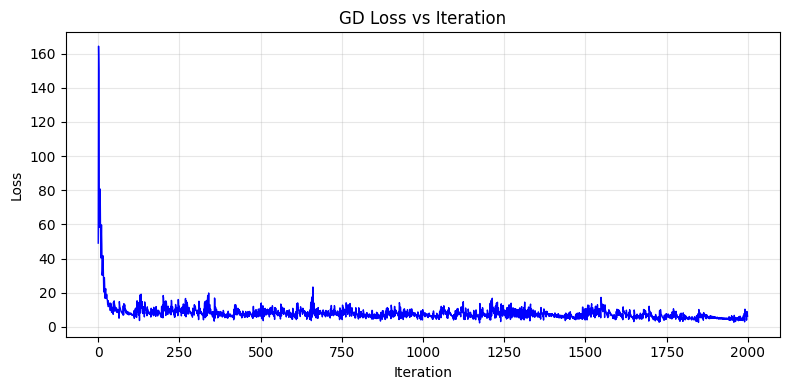

Loss decreased from 49.009037 to 6.217208
Total improvement: 87.31%
Running Neural Network...

--- Sample 8 (Index 270) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.832031
  Inefficiency: 0.998376
  Non-uniformity: 0.760297
Iteration 11/2000
  MSE Error: 4091.974121
  Inefficiency: 0.188045
  Non-uniformity: 0.066341
Iteration 21/2000
  MSE Error: 4091.969238
  Inefficiency: 0.185423
  Non-uniformity: 0.094699
Iteration 31/2000
  MSE Error: 4091.969482
  Inefficiency: 0.185416
  Non-uniformity: 0.094625
Iteration 41/2000
  MSE Error: 4091.968994
  Inefficiency: 0.185420
  Non-uniformity: 0.094330
Iteration 51/2000
  MSE Error: 4091.968750
  Inefficiency: 0.185419
  Non-uniformity: 0.094096
Iteration 61/2000
  MSE Error: 4091.969482
  Inefficiency: 0.185419
  Non-uniformity: 0.093859
Iteration 71/2000
  MSE Error: 4091.969238
  Inefficiency: 0.185420
  Non-uniformity: 0.093682
Iteration 81/2000
  MSE Error: 4091.968994
  Inefficiency: 0.185421
  Non-unif

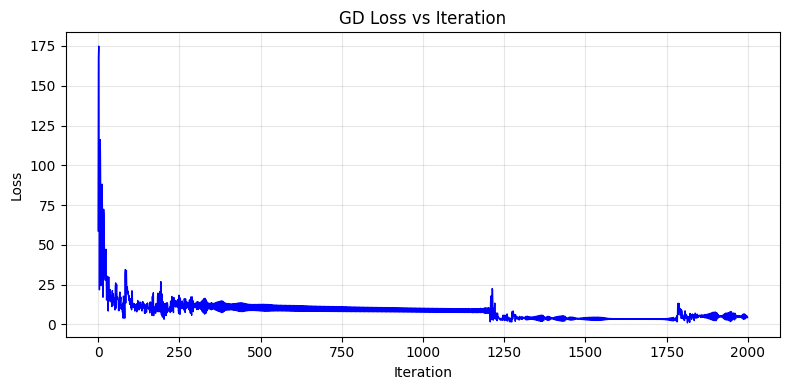

Loss decreased from 58.735420 to 4.234441
Total improvement: 92.79%
Running Neural Network...

--- Sample 9 (Index 331) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.707520
  Inefficiency: 0.997361
  Non-uniformity: 1.046676
Iteration 11/2000
  MSE Error: 4090.090332
  Inefficiency: 0.205396
  Non-uniformity: 0.018740
Iteration 21/2000
  MSE Error: 4090.079590
  Inefficiency: 0.202395
  Non-uniformity: 0.020028
Iteration 31/2000
  MSE Error: 4090.071289
  Inefficiency: 0.200288
  Non-uniformity: 0.018641
Iteration 41/2000
  MSE Error: 4090.067627
  Inefficiency: 0.199173
  Non-uniformity: 0.022160
Iteration 51/2000
  MSE Error: 4090.065430
  Inefficiency: 0.198671
  Non-uniformity: 0.022537
Iteration 61/2000
  MSE Error: 4090.064941
  Inefficiency: 0.198484
  Non-uniformity: 0.022714
Iteration 71/2000
  MSE Error: 4090.064453
  Inefficiency: 0.198365
  Non-uniformity: 0.022384
Iteration 81/2000
  MSE Error: 4090.063965
  Inefficiency: 0.198229
  Non-unif

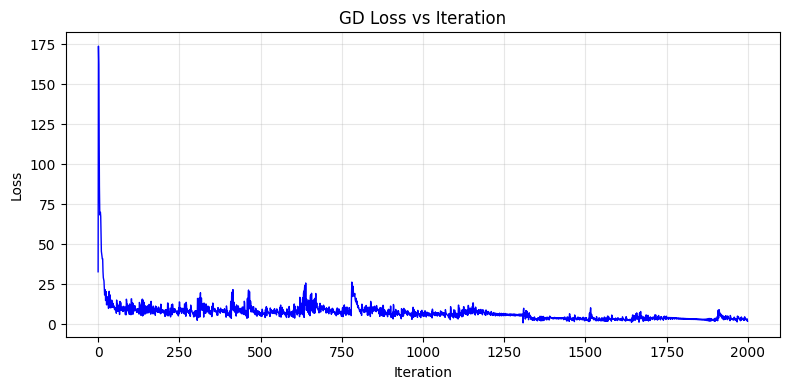

Loss decreased from 32.819256 to 1.870977
Total improvement: 94.30%
Running Neural Network...

--- Sample 10 (Index 170) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.583496
  Inefficiency: 0.996027
  Non-uniformity: 0.855597
Iteration 11/2000
  MSE Error: 4089.291992
  Inefficiency: 0.195135
  Non-uniformity: 0.052815
Iteration 21/2000
  MSE Error: 4089.287598
  Inefficiency: 0.194004
  Non-uniformity: 0.053479
Iteration 31/2000
  MSE Error: 4089.286621
  Inefficiency: 0.193777
  Non-uniformity: 0.053534
Iteration 41/2000
  MSE Error: 4089.285645
  Inefficiency: 0.193545
  Non-uniformity: 0.052629
Iteration 51/2000
  MSE Error: 4089.285156
  Inefficiency: 0.193421
  Non-uniformity: 0.052628
Iteration 61/2000
  MSE Error: 4089.284912
  Inefficiency: 0.193372
  Non-uniformity: 0.051721
Iteration 71/2000
  MSE Error: 4089.284180
  Inefficiency: 0.193287
  Non-uniformity: 0.050705
Iteration 81/2000
  MSE Error: 4089.283691
  Inefficiency: 0.193102
  Non-uni

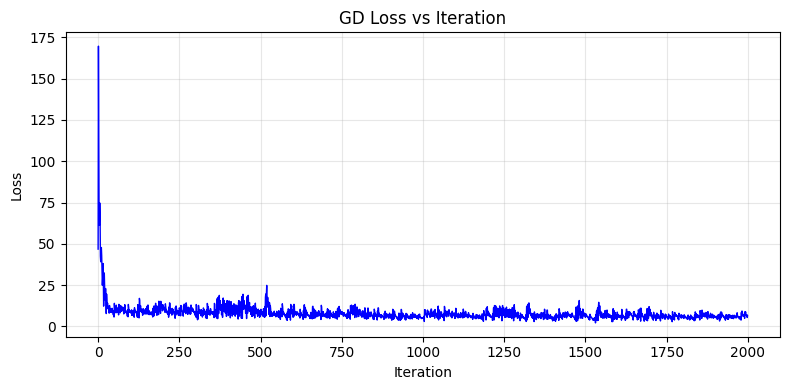

Loss decreased from 46.801155 to 6.408581
Total improvement: 86.31%
Running Neural Network...


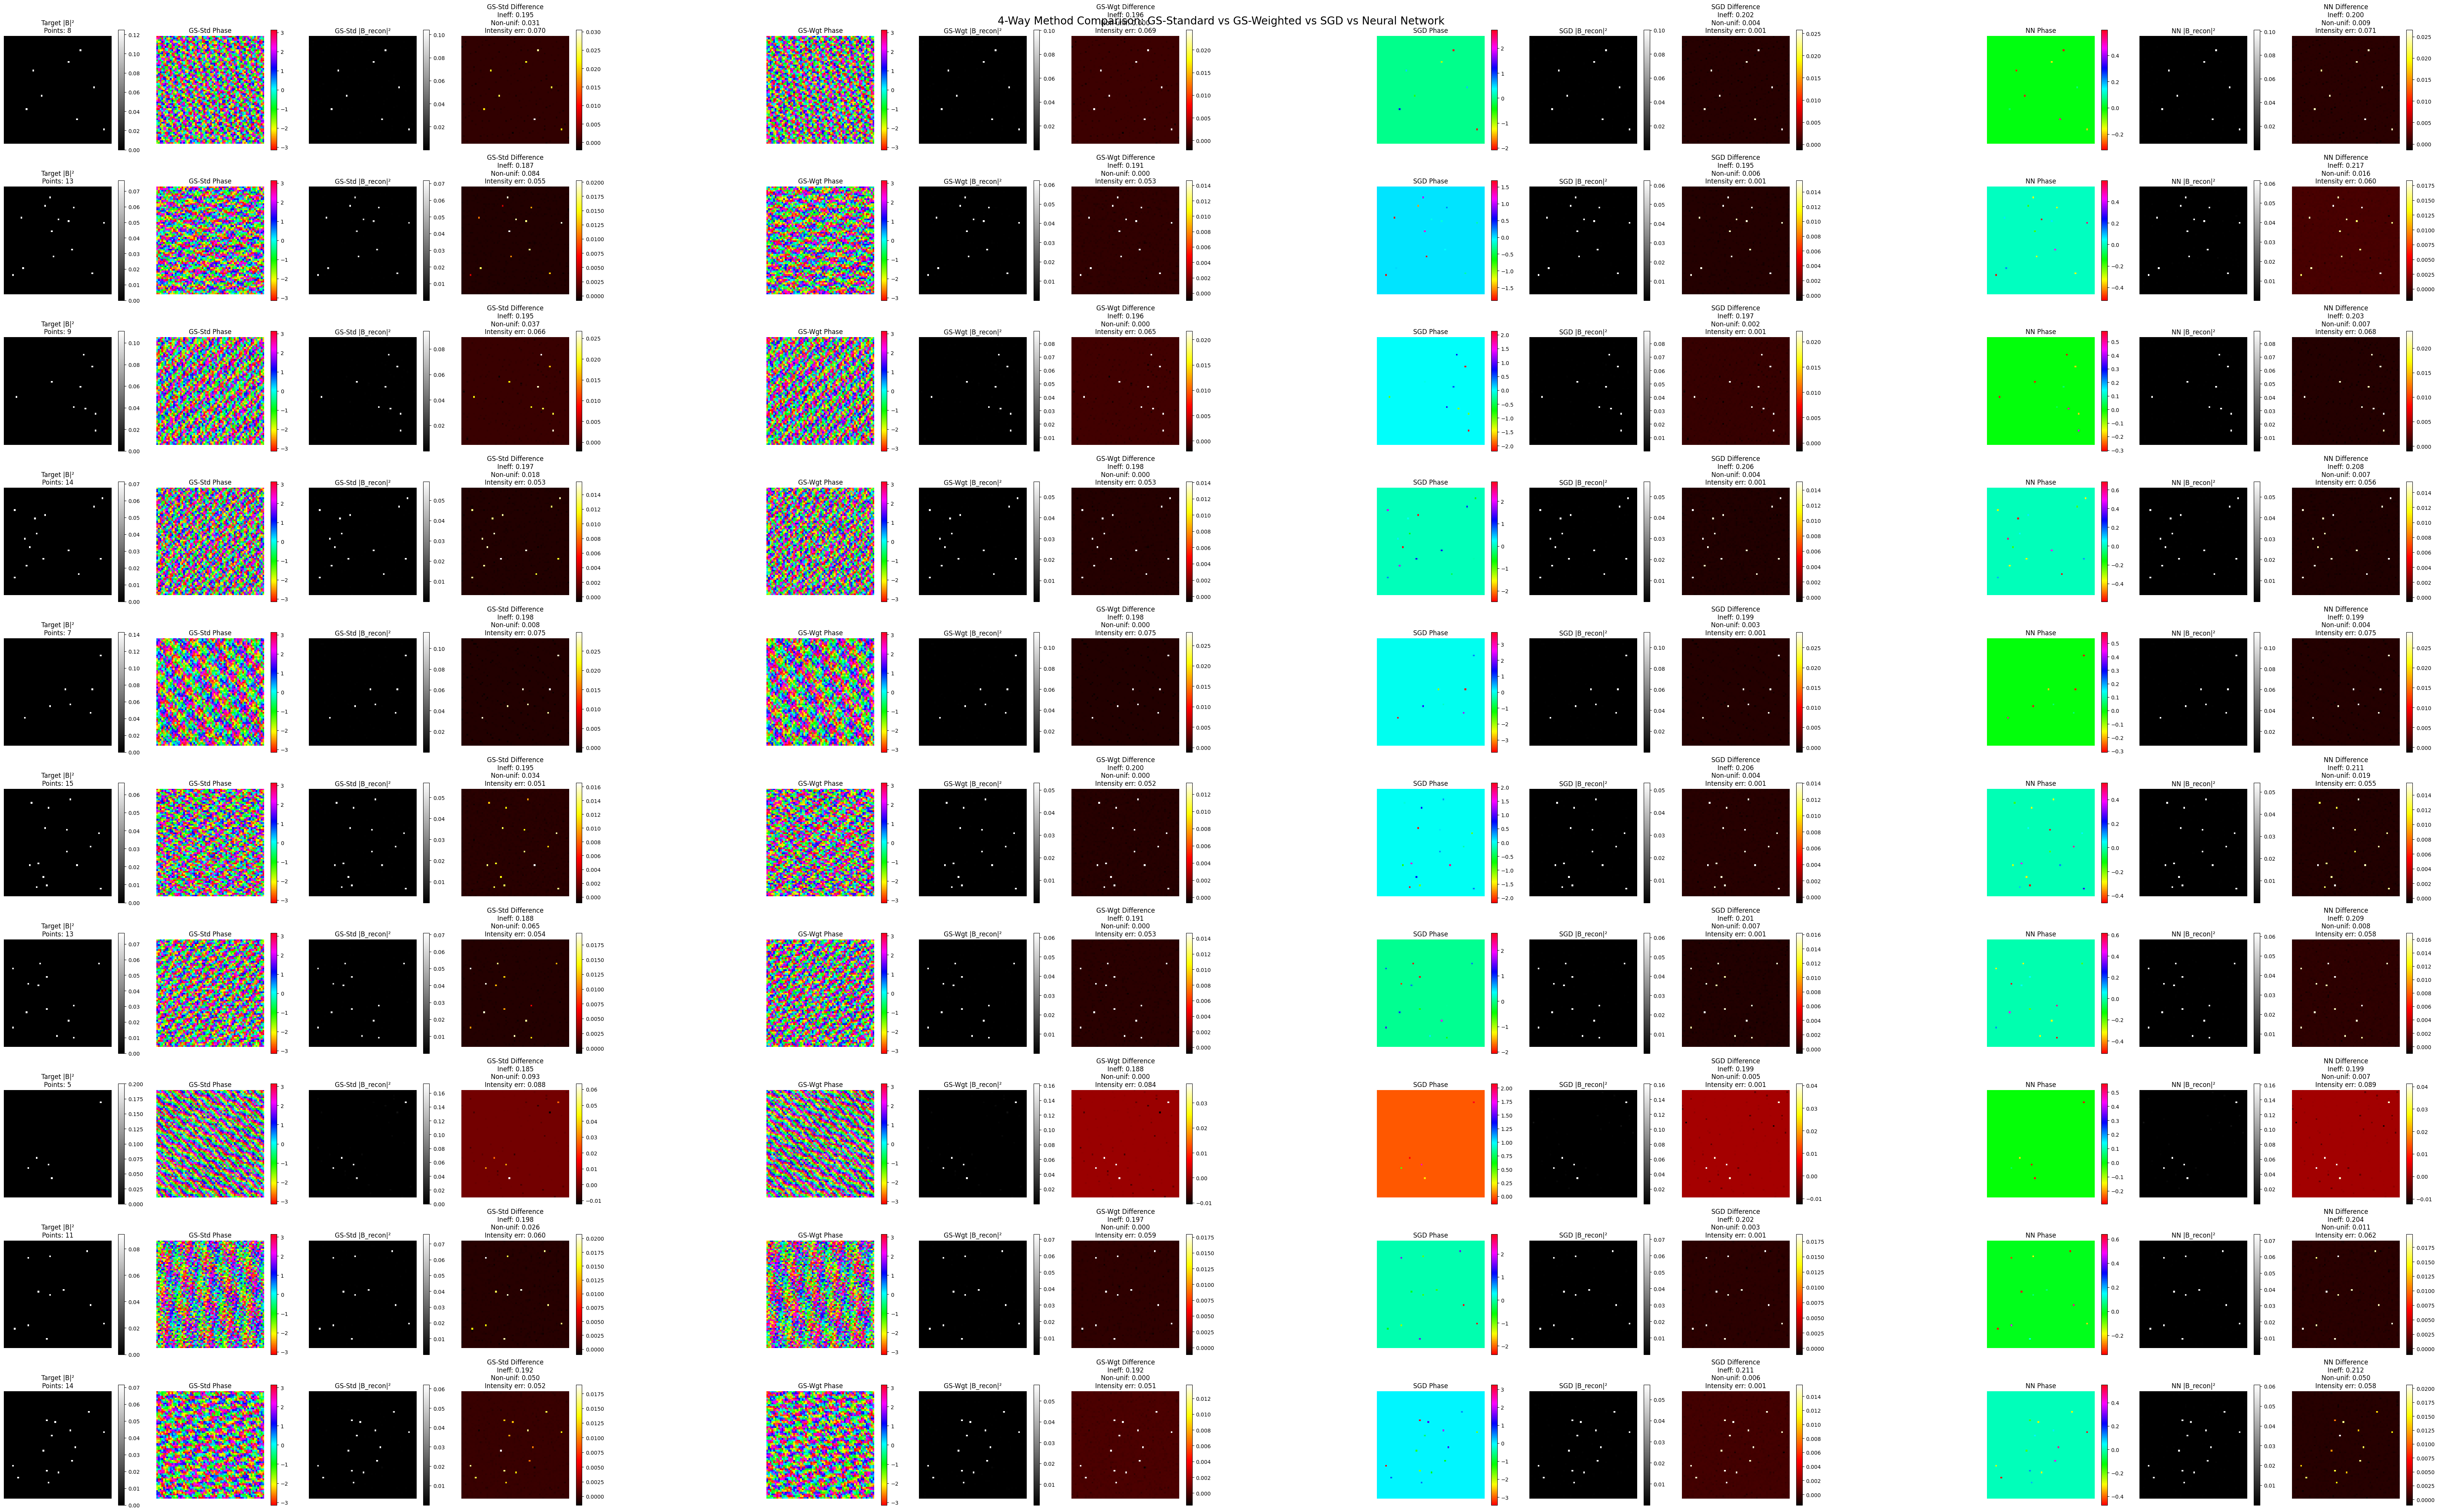


4-WAY METHOD COMPARISON SUMMARY

GS-Standard (Average over 10 samples):
  Inefficiency:    0.1931
  Non-uniformity:  0.0447
  Intensity error: 0.0623
  Reconstruction time: 2.8417 seconds

GS-Weighted (Average over 10 samples):
  Inefficiency:    0.1946
  Non-uniformity:  0.0000
  Intensity error: 0.0614
  Reconstruction time: 1.7930 seconds

SGD (Average over 10 samples):
  Inefficiency:    0.2017
  Non-uniformity:  0.0044
  Intensity error: 0.0010
  Reconstruction time: 16.5649 seconds

NN (Average over 10 samples):
  Inefficiency:    0.2064
  Non-uniformity:  0.0138
  Intensity error: 0.0651
  Reconstruction time: 0.0027 seconds

DETAILED PER-SAMPLE COMPARISON
Sample   Method     Points Ineff    Non-unif Intensity err Time (s)
----------------------------------------------------------------------
Sample 1  GS-Standard 8      0.195    0.031    0.070    2.7521  
Sample 1  GS-Weighted 8      0.196    0.000    0.069    1.4859  
Sample 1  SGD      8      0.202    0.004    0.001    16.38

In [11]:
from vanillanet.compare import compare_all_methods, print_comparison_summary

comparison_results = compare_all_methods(
    dataset=dataset,
    model=model,
    device=device,
    num_samples=10,
    save_path='images/all_methods_comparison.png'
)

print("\n4-way comparison complete! Results:")
print_comparison_summary(comparison_results)

print("\nSaved visualization to 'images/all_methods_comparison.png'")